In [5]:
# Titanic Dataset - Full EDA

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load Dataset
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Step 3: Dataset Summary
print("Shape of the dataset:", df.shape)
print("\nInfo:")
df.info()

# Statistical summary
df.describe()


Shape of the dataset: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Step 4: Handle Missing Data
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns='Cabin', inplace=True)

# Confirm missing values handled
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\abhir\AppData\Local\Temp\ipykernel_23308\429580470.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\abhir\AppData\Local\Temp\ipykernel_23308\429580470.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

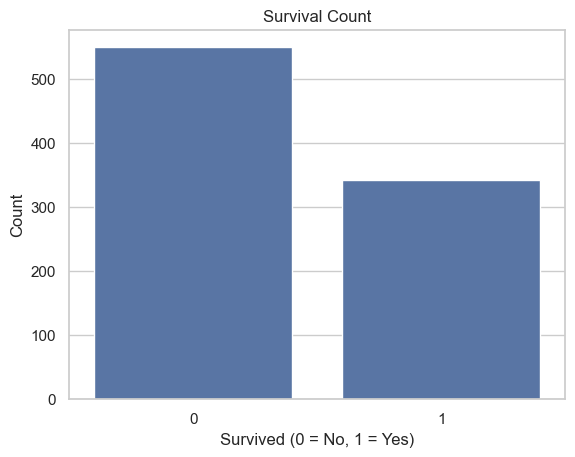

In [9]:
# Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


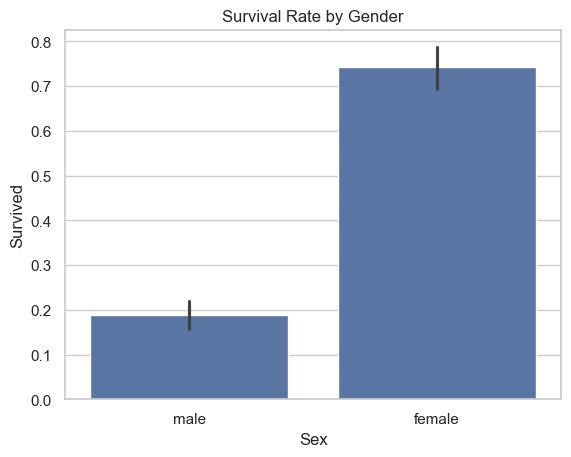

In [10]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


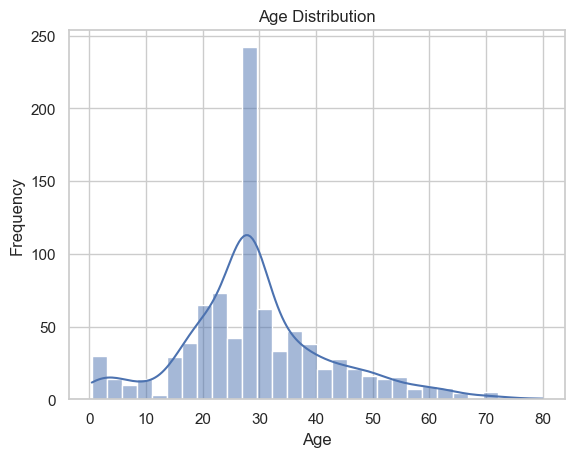

In [11]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


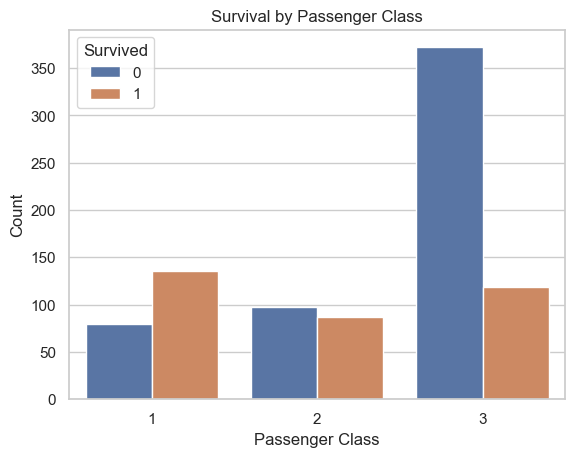

In [12]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


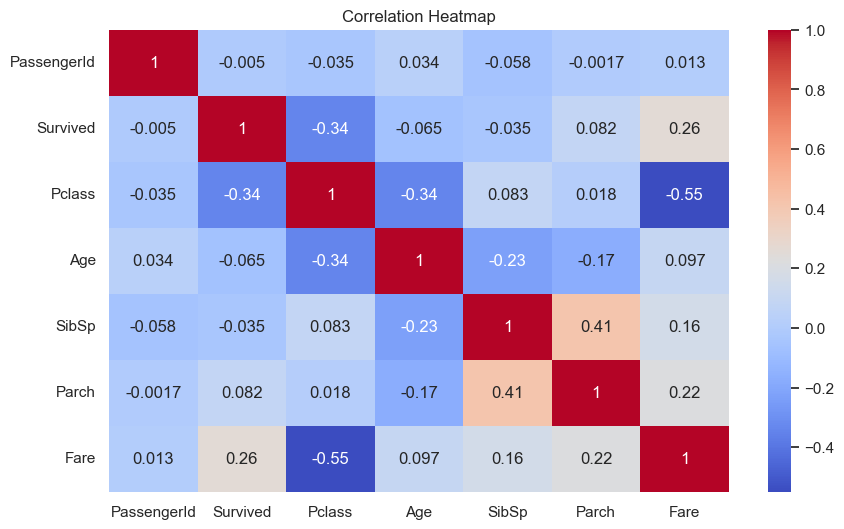

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


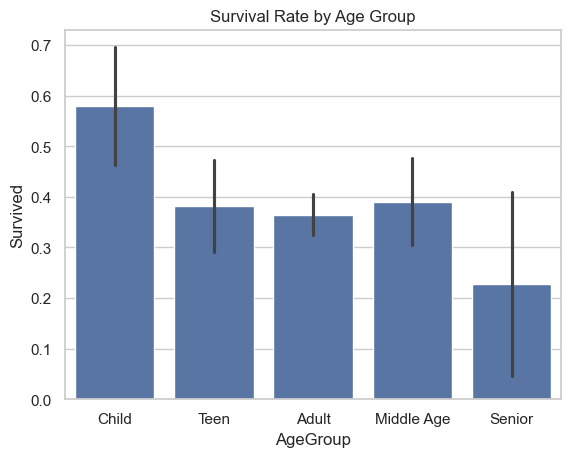

In [15]:
# Age group based survival
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80],
labels=["Child", "Teen", "Adult", "Middle Age", "Senior"])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()


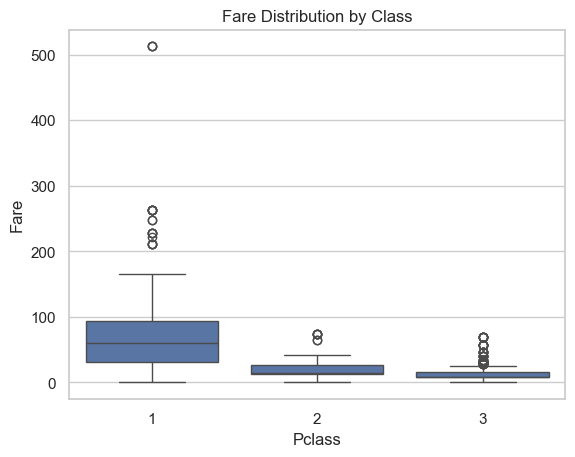

In [16]:
# Fare distribution by class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()


In [17]:
# Basic value counts
print("Survival Distribution:\n", df['Survived'].value_counts())
print("\nClass Distribution:\n", df['Pclass'].value_counts())


Survival Distribution:
 Survived
0    549
1    342
Name: count, dtype: int64

Class Distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [18]:
# Crosstab: Survival by Gender
print("Survival by Gender:\n", pd.crosstab(df['Sex'], df['Survived'], margins=True))

# Crosstab: Survival by Class
print("\nSurvival by Class:\n", pd.crosstab(df['Pclass'], df['Survived'], margins=True))


Survival by Gender:
 Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Survival by Class:
 Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


# Summary of Findings
- Missing values were present in 'Age', 'Embarked', and 'Cabin'. We imputed 'Age' and 'Embarked' and dropped 'Cabin'.
- Females had significantly higher survival rates than males.
- 1st class passengers survived more frequently than 2nd and 3rd class.
- Younger age groups, especially children, had higher survival rates.
- Fare and Pclass have strong influence on survival.
- No significant missing data remains after preprocessing.

